In [3]:
from SPV_utils import *

../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_1.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_2.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_3.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_4.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_5.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_6.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_7.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_8.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_9.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_10.npy
../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_11.npy
94 14.0


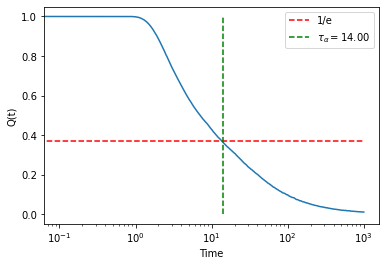

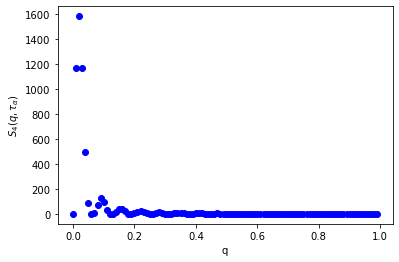

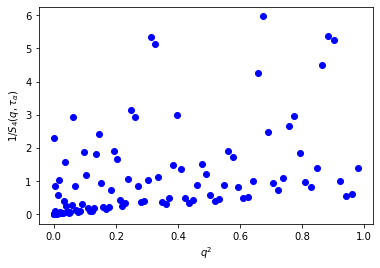

In [4]:
# Ns = [100, 144, 196, 256, 324, 400, 625, 1444]
# disps = get_all_data_npy(rf"Data_small_v0\Data\coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
# disps = get_all_data_npy(rf"Different_v0_Ens=100/Pin=0/Data/coordinate_p0=3.80_v0={v0}_pin=0_set_", False)
T_alpha_results = {}
S4s_all = {}

for N in [10000]:
    # disps = get_all_data(rf"100_Ensemble\N={N}_pin=0\N={N}\coordinate_p0=3.80_v0=0.50_pin=0_set_", False, 10)
    disps = get_all_data_npy(rf"../Pin=0/coordinate_p0=3.80_v0=0.25_pin=0_set_", False, 10)
    Q_t_avg = np.zeros(len(disps[1][0]), dtype=np.complex128)
    for i in disps.keys():
        timestamps, arrs, N = disps[i]
        Q_t_avg +=Q_t(arrs, arrs[0])
    Q_t_avg /= len(disps.keys())
    T_alpha_ind = np.where(np.abs(Q_t_avg) < 1/np.e)[0][0]
    T_alpha = timestamps[T_alpha_ind]
    
    T_alpha_results[N] = T_alpha_ind

    print(T_alpha_ind, T_alpha)

    plt.plot(timestamps, np.abs(Q_t_avg))
    plt.xscale('log')
    plt.xlabel("Time")
    plt.ylabel("Q(t)")
    plt.hlines(1/np.e, colors='r', linestyles='dashed', label = '1/e', xmin = timestamps[0], xmax = timestamps[-1])
    plt.vlines(T_alpha, ymin=0, ymax=1, colors='g', linestyles='dashed', label = r"$\tau_{\alpha} = $" + f"{T_alpha:.2f}")
    plt.legend()

    plt.show()

    
    
    S4s = {}    
    for q in np.arange(0, 1, 0.01):
        # print(q)
        S4s[q] = S4(q, disps)
    S4s_all[N] = S4s
    
    
    
    # for q in S4s.keys():
    #     plt.plot(timestamps, np.abs(S4s[q]), label = f"q= {q:.2f}")
    # plt.legend()
    # plt.title(f"N={N}")
    # plt.xlabel("Time")
    # plt.ylabel(r"$S_4(q,t)$")
    # plt.xscale('log')
    # plt.show()
    
    
    for q in S4s.keys():
        plt.plot(q, np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
    plt.xlabel("q")
    plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
    plt.show()
    
    
    for q in S4s.keys():
        plt.plot(q**2, 1/np.abs(S4s[q][T_alpha_ind]), 'o', c = 'b')
    plt.xlabel(r"$q^2$")
    plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
    plt.show()

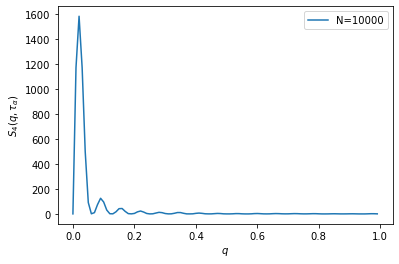

In [8]:
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    S4_q_alpha = np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs])
    plt.plot(qs, S4_q_alpha,  label = f"N={N}")
plt.xlabel(r"$q$")
plt.ylabel(r"$S_4(q,\tau_{\alpha})$")
plt.legend()
plt.show()

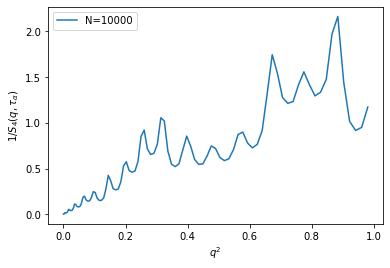

In [15]:
for N in S4s_all.keys():
    S4s = S4s_all[N]
    qs = np.array(list(S4s.keys()))
    # S4_q_alpha = np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs]) + 0.001
    S4_q_alpha = np.convolve(np.array([np.abs(S4s[q][T_alpha_results[N]]) for q in qs]), np.ones(5)/5, 'same')

    plt.plot(qs**2, 1/S4_q_alpha, label = f"N={N}")
plt.xlabel(r"$q^2$")
plt.ylabel(r"$1/S_4(q,\tau_{\alpha})$")
plt.legend()
plt.show()